# Group members

+ Student Name: Zexing Zhi    Student ID:
+ Student Name: Qiuchen Liu   Student ID:
+ Student Name: Shihang Li    Student ID:320190940151

# Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sweet_df = pd.read_csv("candy.csv")
sweet_df.head()

,brand,I like them a lot,I like them,Neutrals and Don't know,I dislike them,I dislike them a lot
0,Mars,15,57,18,7,3
1,Milky Way,16,52,23,6,3
2,Twix,18,57,19,4,2
3,Snickers,23,42,17,9,9
4,Bounty,24,36,15,11,14


The meaning of values except the first column;
- 1: I dislike them a lot;
- 2: I dislike them;
- 3: Neutrals and Don't know
- 4: I like them;
- 5: I like them a lot;

# Replicate the figure

In [3]:
def percent_preference(preference):
    percent_list = list()
    pre_data = sweet_df[preference]
    for i in range(len(sweet_df.brand)):
        brand_sum = sweet_df.iloc[i].values[1:].sum()
        value = pre_data[i]
        percent = value / brand_sum
        percent_list.append(percent)
    return percent_list

In [4]:
def percent_dict(preference):
    percent_list = list()
    pre_data = sweet_df[preference]
    for i in range(len(sweet_df.brand)):
        brand_sum = sweet_df.iloc[i].values[1:].sum()
        value = pre_data[i]
        percent = value / brand_sum
        percent_dict = dict()
        percent_dict['value'] = value
        percent_dict['percent'] = percent
        percent_list.append(percent_dict)
    return percent_list

In [5]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType


c = (
    Bar(init_opts=opts.InitOpts(width="1050px", height="500px"))
    .add_xaxis(sweet_df.brand.values.tolist())
    .add_yaxis("I like them a lot",percent_preference("I like them a lot"), stack="stack1",color='#384C70')
    .add_yaxis("I like them", percent_preference("I like them"), stack="stack1",color='#3481B8')
    .add_yaxis("Neutrals and Don't know", percent_preference("Neutrals and Don't know"), stack="stack1",color='#A5A8A6')
    .add_yaxis("I dislike them", percent_preference("I dislike them"), stack="stack1",color='#DB6A50')
    .add_yaxis("I dislike them a lot", percent_preference("I dislike them a lot"), stack="stack1",color='#AB2524')
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="inside", color="white", font_size=15))
    .set_global_opts(
#         title_opts=opts.TitleOpts(title="Bounty & Snickers are the two most controversial candy bars in Celebrations"),
        yaxis_opts=opts.AxisOpts(name="Brand"),
        xaxis_opts=opts.AxisOpts(name="Percent"),
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="inside",
            formatter=JsCode(
                "function(x){return Number(x.data * 100).toFixed() + '%';}"
            ),
        )
    )
)
c.render_notebook()

# Improve the figure

## Method 1

In [6]:
list1 = [
    {"value": 42, "percent": 42/82},
    {"value": 51, "percent": 51/77},
    {"value": 46, "percent": 46/81},
    {"value": 36, "percent": 36/83},
    {"value": 42, "percent": 42/85},
    {"value": 57, "percent": 57/83},
    {"value": 52, "percent": 52/85},
    {"value": 57, "percent": 57/86},
]

list2 = [
    {"value": 39, "percent": 39/82},
    {"value": 29, "percent": 29/77},
    {"value": 27, "percent": 27/81},
    {"value": 24, "percent": 24/83},
    {"value": 23, "percent": 23/85},
    {"value": 18, "percent": 18/83},
    {"value": 16, "percent": 16/85},
    {"value": 15, "percent": 15/86},
]

list4 = [
    {"value": 7, "percent": 7/82},
    {"value": 6, "percent": 6/77},
    {"value": 4, "percent": 4/81},
    {"value": 9, "percent": 9/83},
    {"value": 11, "percent": 11/85},
    {"value": 8, "percent": 8/83},
    {"value": 4, "percent": 4/85},
    {"value": 4, "percent": 4/86},
]

list5 = [
    {"value": 3, "percent": 3/82},
    {"value": 3, "percent": 3/77},
    {"value": 2, "percent": 2/81},
    {"value": 9, "percent": 9/83},
    {"value": 14, "percent": 14/85},
    {"value": 2, "percent": 2/83},
    {"value": 1, "percent": 1/85},
    {"value": 1, "percent": 1/86},
]
c = (
    Bar(init_opts=opts.InitOpts(width="1150px", height="550px"))
    .add_xaxis(sweet_df.brand.values.tolist())
    .add_yaxis("I like them a lot", list2, stack="stack1", category_gap="50%",color='#384C70')
    .add_yaxis("I like them", list1, stack="stack1", category_gap="50%",color='#3481B8')
    .add_yaxis("I dislike them", list4, stack="stack1", category_gap="50%",color='#DB6A50')
    .add_yaxis("I dislike them a lot", list5, stack="stack1", category_gap="50%",color='#AB2524')
    .reversal_axis()
    .set_global_opts(
#         title_opts=opts.TitleOpts(title="Bounty & Snickers are the two most controversial candy bars in Celebrations"),
        yaxis_opts=opts.AxisOpts(name="Brand"),
        xaxis_opts=opts.AxisOpts(name="Number of Person"),
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="inside",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        )
    )
)
c.render_notebook()

## Method 2

In [8]:
df = pd.read_csv("sweet.csv")
df = df.iloc[:,1:]
labels = list(df.columns)
data = np.zeros(shape = (5,8),dtype = "int")
for i in range(len(labels)):
    for j in sorted(df[labels[i]].unique()):
        data[j - 1][i]= len(df[df[labels[i]] == j])

In [9]:
item = ["I dislike them them a lot", "I dislike them", "Don't Know", "I like them", "I like them a lot"]
color = ["red","blue","black","orange","green"]

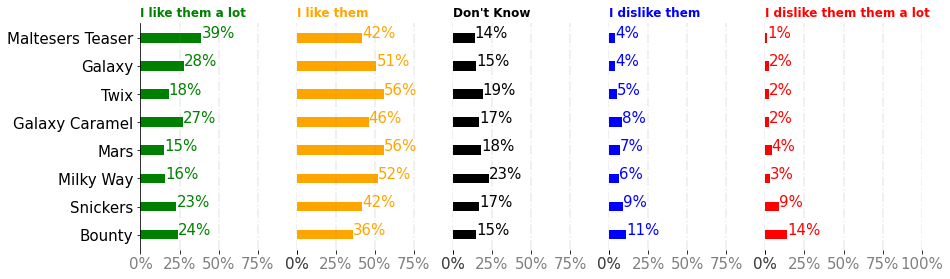

In [10]:
data = data /100
fig, ax = plt.subplots(1,5,figsize = (14,8.35/2))
width = 0.35
x = np.arange(len(labels))
key_la = 0
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
for i in range(len(data)):
    ax[i].set_xlim(0 - 0.175,8 + 0.175)
    ax[4-i].set_title(item[i],loc = 'left',fontsize='12', fontweight='bold', color = color[key_la])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    
    ax[4-i].barh(x, data[i], width, label = item[key_la], color = color[key_la])
    j = 0
    for per in data[i]:
        word = str(round(per*100)) + "%"
        ax[4-i].text(per, x[j], word, fontdict={'size':15}, color = color[key_la])
        j+=1
    if i == 0:
        ax[i].set_yticks([i for i in range(0,8)])
        ax[i].set_yticklabels(labels, fontdict={'size':15})
    if i != 0:
        ax[i].spines['left'].set_visible(False)
        ax[i].set_yticks([])
    if i != 4:
        ax[i].set_xticks([0,0.25,0.5,0.75,1])
        ax[i].set_xticklabels(["0%","25%","50%","75%","0%"], alpha = 0.5, fontdict={'size':15})
    elif i == 4:
        ax[i].set_xticks([0,0.25,0.5,0.75,1])
        ax[i].set_xticklabels(["0%","25%","50%","75%","100%"],alpha = 0.5, fontdict={'size':15})
    ax[i].set_xlim(0,1)
    for j in range(1,5):
        ax[i].axvline(x=j/4,ls="-.",c="gray",alpha = 0.15)
    key_la += 1
plt.savefig("new.png")
plt.show()